In [22]:
import numpy as np
from datascience import *
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

## Class 18: Developing intuition for correlation 

### Goals:
- Understand data standardization
- Understand why uncorrelated data produces r = 0
- Understand the sensitivities of correlation r

To standardize data, we:
- subtract the data mean => new mean is zero
- divide by standard deviation => new standard deviation is 1

Let's generate some data and then standardize it.

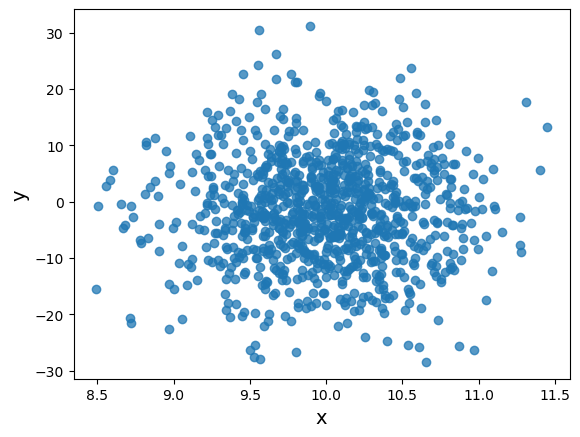

In [23]:
# mu = mean, sigma = standard deviation
mu_x = 10
sigma_x = 0.5
mu_y = -1
sigma_y = 10

# variables x and y are normally distributed random values (randn)
x = sigma_x * np.random.randn(1000) + mu_x
y = sigma_y * np.random.randn(1000) + mu_y

plt.figure()
plt.scatter(x, y, alpha=0.75)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.show()

Note that the data are not centered at 0, and the x axis scale is much smaller than the scale of y.

Standardizing the data involves subtracting the mean and dividing by the standard deviation. This effectively shifts the data to be centered on zero, and make the average difference between the data and the mean one (that is after all what we mean by standard deviation). 

In [31]:
# first subtract the mean
x_mean_norm = x - np.mean(x)
print(f'The mean of data once mean is subtracted is {np.mean(x_mean_norm):0.2f}')

# next we divide by the standard deviation
x_standard = x_mean_norm/np.std(x)
print(f'The standard deviation of data divided by its standard deviation is is {np.std(x_standard):0.2f}')

The mean of data once mean is subtracted is -0.00
The standard deviation of data divided by its standard deviation is is 1.00


Now that we have this down, we can use the function standard_units to do this to any data:

In [32]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers) 

Now standardize both x and y, and plot

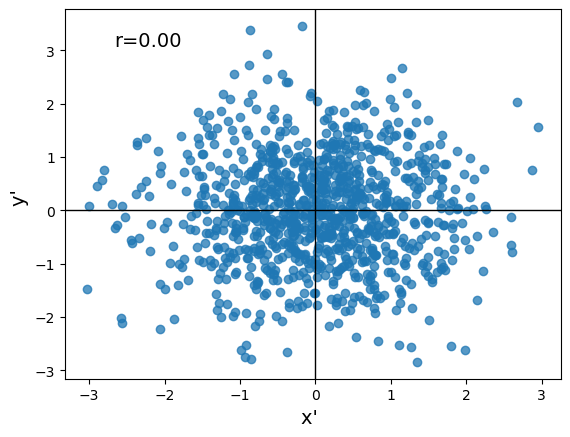

In [33]:
x_prime = standard_units(x)
y_prime = standard_units(y)
r = np.mean(x_prime*y_prime)

plt.figure()
ax = plt.gca()
plt.scatter(x_prime, y_prime, alpha=0.75)
plt.axvline(0.0, color='k', linewidth=1)
plt.axhline(0.0, color='k', linewidth=1)
plt.text(0.1,0.9, f'r={r:.2f}', transform=ax.transAxes, fontsize=14)
plt.xlabel("x' ", fontsize=14)
plt.ylabel("y' ", fontsize=14)
plt.show()

The correlation coefficient r is: `mean(x_prime * y_prime)`. Here that value is close to zero. Why? One way to think about this is to look at the sign `x_prime * y_prime`. Depending on which quadrant the data are in (position relative to the x and y axes), the sign of the product will be positive or negative. 

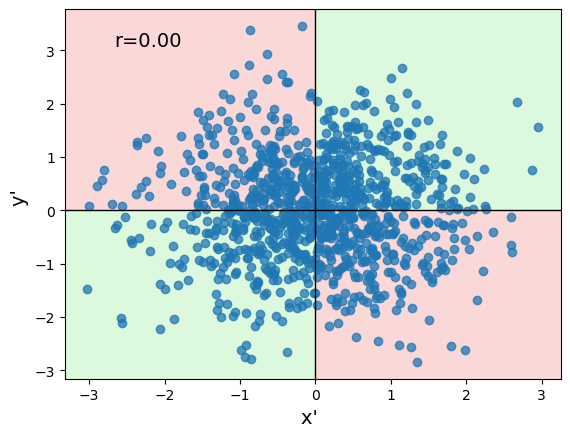

In [34]:
plt.figure()
ax = plt.gca()
plt.scatter(x_prime, y_prime, alpha=0.75, zorder=3)

x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()

# code here is to make the colored background for the four quadrants of the graph
def add_rect(x_lim, y_lim, color, alpha=0.3):
    x_start, x_end = x_lim
    y_start, y_end = y_lim
    ax.add_patch(Rectangle((x_start, y_start), x_end - x_start, y_end - y_start,
                            facecolor=color, edgecolor='none', alpha=alpha, zorder=0))
add_rect((0, x1), (0, y1), color='lightgreen')
add_rect((x0, 0), (0, y1), color='lightcoral')
add_rect((x0, 0), (y0, 0), color='lightgreen')
add_rect((0, x1), (y0, 0), color='lightcoral')

# back to normal plot details
plt.axvline(0.0, color='k', linewidth=1, zorder=4)
plt.axhline(0.0, color='k', linewidth=1, zorder=4)
plt.text(0.1, 0.9, f'r={r:.2f}', transform=ax.transAxes, fontsize=14)
plt.xlabel("x' ", fontsize=14)
plt.ylabel("y' ", fontsize=14)
plt.show()

In the green quadrants above, the product `x_prime * y_prime` is positive. In the areas shaded in red, the product is negative. Because the distribution of data in each quadrant is about the same (because of how we generated them), the positive and negative values of the product cancel out when we take the mean `r = np.mean(x_prime * y_prime)`.

### What if we remove the data in quadrants with negative products (red)?

Text(0.1, 0.9, 'r=0.65')

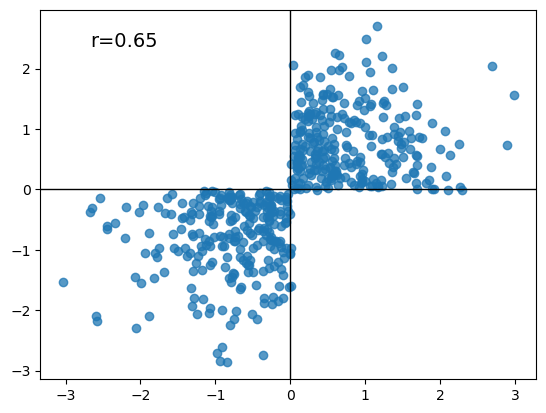

In [35]:
x_prime_1 = standard_units(x_prime[x_prime*y_prime>0])
y_prime_1 = standard_units(y_prime[x_prime*y_prime>0])
r = np.mean(x_prime_1*y_prime_1)

plt.figure()
ax = plt.gca()
plt.scatter(x_prime_1, y_prime_1, alpha=0.75)
plt.axvline(0.0, color='k', linewidth=1)
plt.axhline(0.0, color='k', linewidth=1)
plt.text(0.1,0.9, f'r={r:.2f}', transform=ax.transAxes, fontsize=14)

Without the data in the negative quadrants, the r value has increased significantly. But it's still not 1! Notice that there's still a lot of spread in the data. To get the strongest correlation (1) we want to do is maximize the product `x_prime * y_prime`. Because the spread of the data is always normalized to be one, it turns out the best way to do this is to have multiple points where `x_prime` ≈ `y_prime`. Let's focus on just the points in our dataset where that is the case.

Text(0.1, 0.9, 'r=1.00')

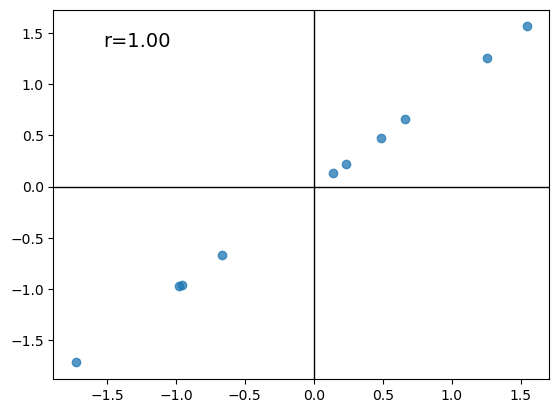

In [36]:
x_prime_2 = standard_units(x_prime[np.isclose(x_prime, y_prime, atol=1e-2)]) # isclose will return a boolean array where x_prime is within 1e-2 of y_prime.
y_prime_2 = standard_units(y_prime[np.isclose(x_prime, y_prime, atol=1e-2)])
r = np.mean(x_prime_2*y_prime_2)

plt.figure()
ax = plt.gca()
plt.scatter(x_prime_2, y_prime_2, alpha=0.75)
plt.axvline(0.0, color='k', linewidth=1)
plt.axhline(0.0, color='k', linewidth=1)
plt.text(0.1,0.9, f'r={r:.2f}', transform=ax.transAxes, fontsize=14)

Wow, focusing on only points where x is nearly equal to y, we get a correlation of 1.0!

### Effect of outliers on correlation

Whenever we take a mean, the result will be highly sensitive to outliers. The correlation coefficient is no exception. Let's take this strongly correlated subset and add one additional point.

Text(0.1, 0.9, 'r=0.47')

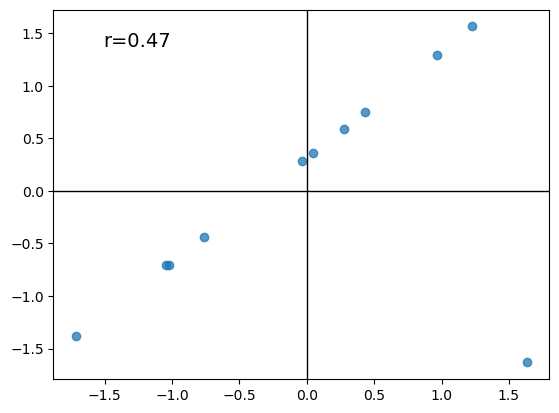

In [43]:
x_prime_3 = standard_units(np.append(x_prime_2, 2))
y_prime_3 = standard_units(np.append(y_prime_2, -2))

r = np.mean(x_prime_3*y_prime_3)

plt.figure()
ax = plt.gca()
plt.scatter(x_prime_3, y_prime_3, alpha=0.75)
plt.axvline(0.0, color='k', linewidth=1)
plt.axhline(0.0, color='k', linewidth=1)
plt.text(0.1,0.9, f'r={r:.2f}', transform=ax.transAxes, fontsize=14)

One additional point in the lower right pulls the correlation down significantly. This is something to watch out for in your data.

### Correlation coefficient generally works best for linear trends

The data below are clearly related (by a quadratic function), but the correlation is zero. We will need other tools to confirm relationships like the one below.

Text(0.1, 0.9, 'r=0.00')

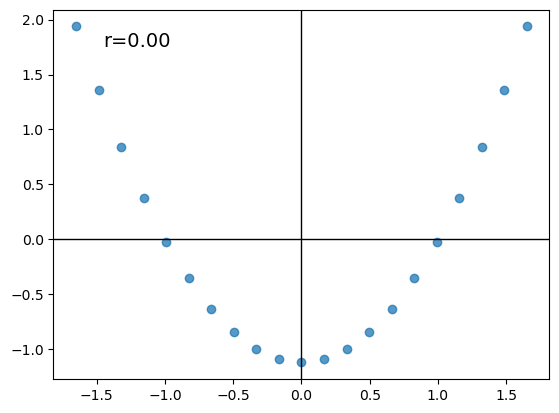

In [44]:
x = np.arange(-10,11)
y = x**2

x_prime = standard_units(x)
y_prime = standard_units(y)
r = np.mean(x_prime*y_prime)

plt.figure()
ax = plt.gca()
plt.scatter(x_prime, y_prime, alpha=0.75)
plt.axvline(0.0, color='k', linewidth=1)
plt.axhline(0.0, color='k', linewidth=1)
plt.text(0.1,0.9, f'r={r:.2f}', transform=ax.transAxes, fontsize=14)


The example will be tough for a lot of metrics of correlation, because y alternately decreases then increases with increasing x. Below is a nonlinear example that is monotonic (y only increases with x). However, because the relationship is nonlinear, the correlation coefficient is still < 1.

Text(0.1, 0.9, 'r=0.86')

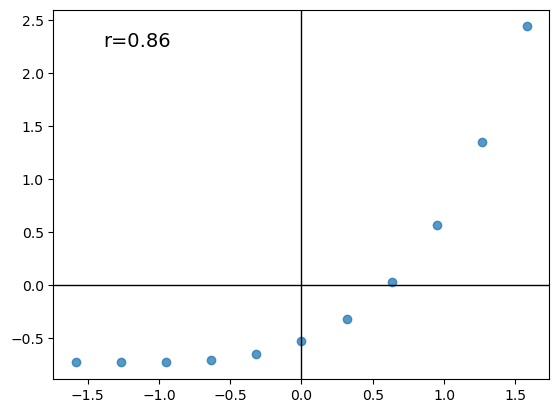

In [45]:
x = np.arange(0,11)
y = x**4

x_prime = standard_units(x)
y_prime = standard_units(y)
r = np.mean(x_prime*y_prime)

plt.figure()
ax = plt.gca()
plt.scatter(x_prime, y_prime, alpha=0.75)
plt.axvline(0.0, color='k', linewidth=1)
plt.axhline(0.0, color='k', linewidth=1)
plt.text(0.1,0.9, f'r={r:.2f}', transform=ax.transAxes, fontsize=14)

### Bonus:
While the Pearson correlation coefficient reads this as less than 1, there are other correlation cofficients that are better suited to identifying the strength of nonlinear trends. One important one is the Spearman Rank Correlation Coefficient, which essentially tests for monotonicity (that y only increases with x).

In [42]:
from scipy import stats

x = np.arange(0,11)
y = x**4

corr, _ = stats.spearmanr(x, y)
print(f'Spearman Correlation: {corr:.2f}')

Spearman Correlation: 1.00
